In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


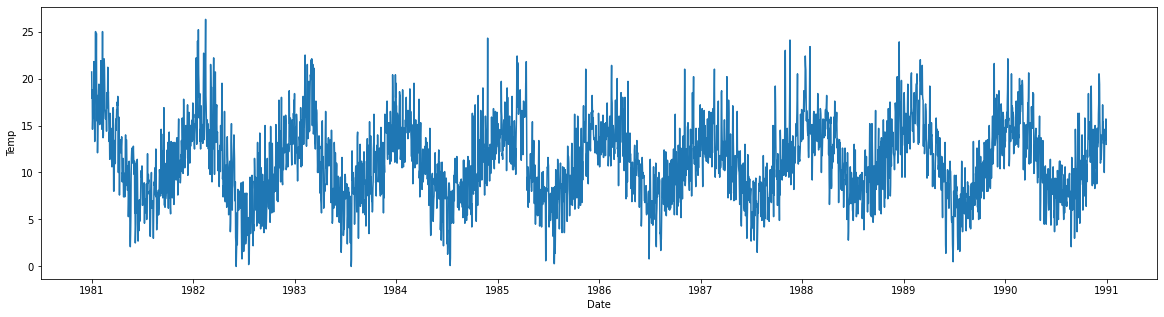

In [11]:
series = pd. read_csv("daily-min-temperatures.csv", header=0, index_col=0, parse_dates=False)
series.index = pd.to_datetime(series.index, format="%d-%m-%Y" ) #format="%Y-%m-%d" 
print(series.head())
plt.figure(figsize=(20,5))
plt.plot(series.index, series.values)
plt.xlabel('Date')
plt.ylabel('Temp')
plt.show()

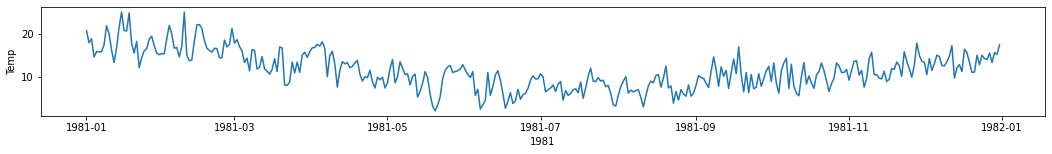

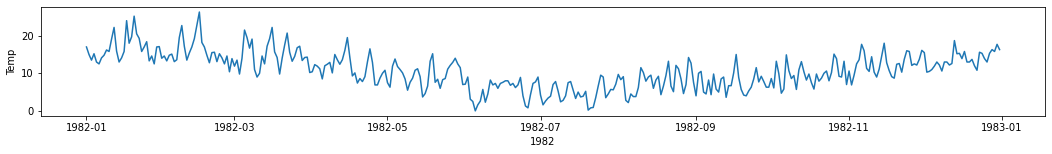

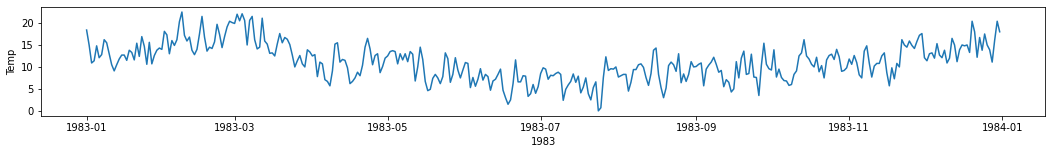

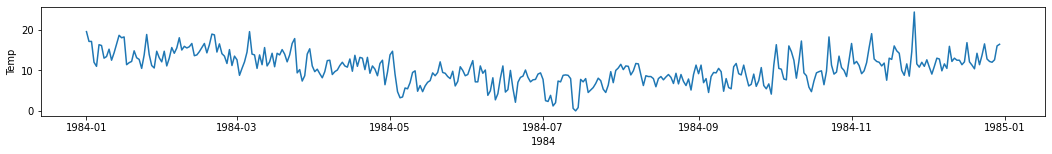

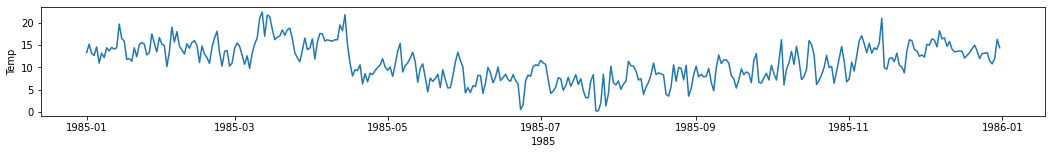

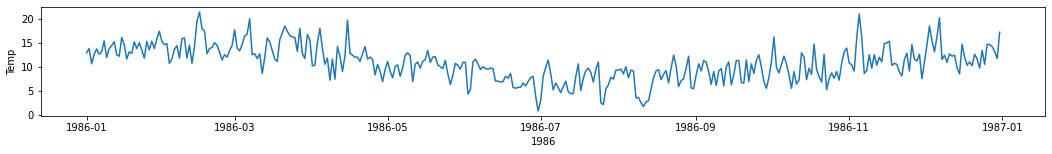

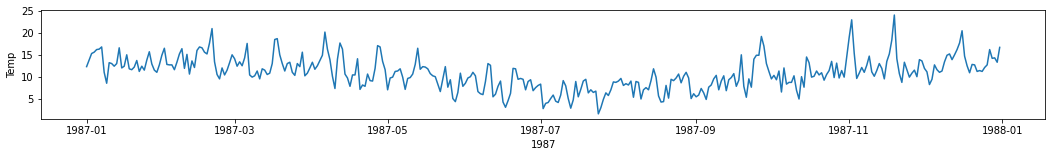

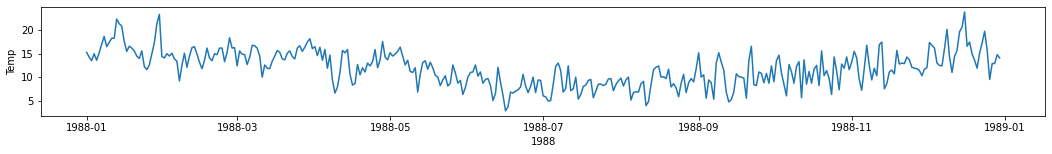

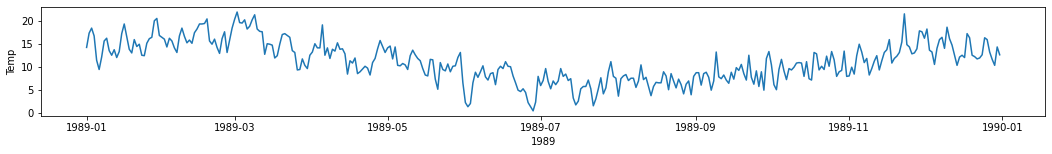

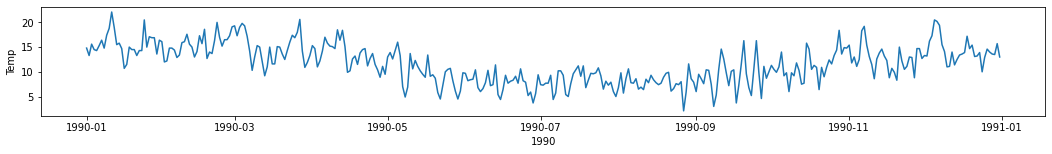

In [12]:
for i in list(series.index.year.unique()):
    plt.figure(figsize=(18,2))
    plt.plot(series[series.index.year == i])
    plt.ylabel('Temp')
    plt.xlabel(i)
plt.show()

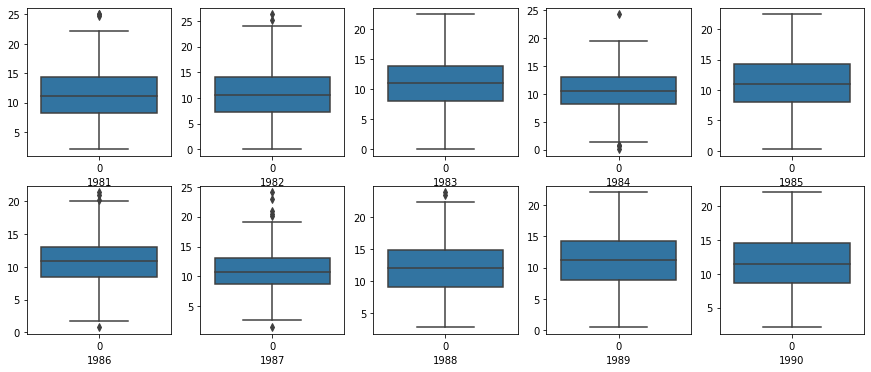

In [13]:
plt.figure(figsize=(15,6))
for i in list(series.index.year.unique()):
    plt.subplot(2,5,i-1980)
    sns.boxplot(series[series.index.year == i].values)
    plt.xlabel(i)
plt.show()    


## White Noise

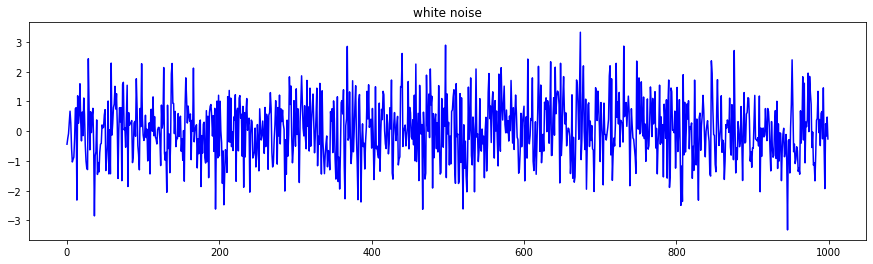

In [14]:
noise = pd.Series(np.random.normal(0,1,1000))
plt.figure(figsize=(15,4))
noise.plot(style='b').set(title="white noise")
plt.show()

In [15]:
noise.describe()

count    1000.000000
mean        0.035040
std         0.999150
min        -3.319159
25%        -0.634875
50%         0.023107
75%         0.709111
max         3.328857
dtype: float64

In [16]:
series.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


## Decompose Time Series

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
temp = series.sort_index()
temp.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


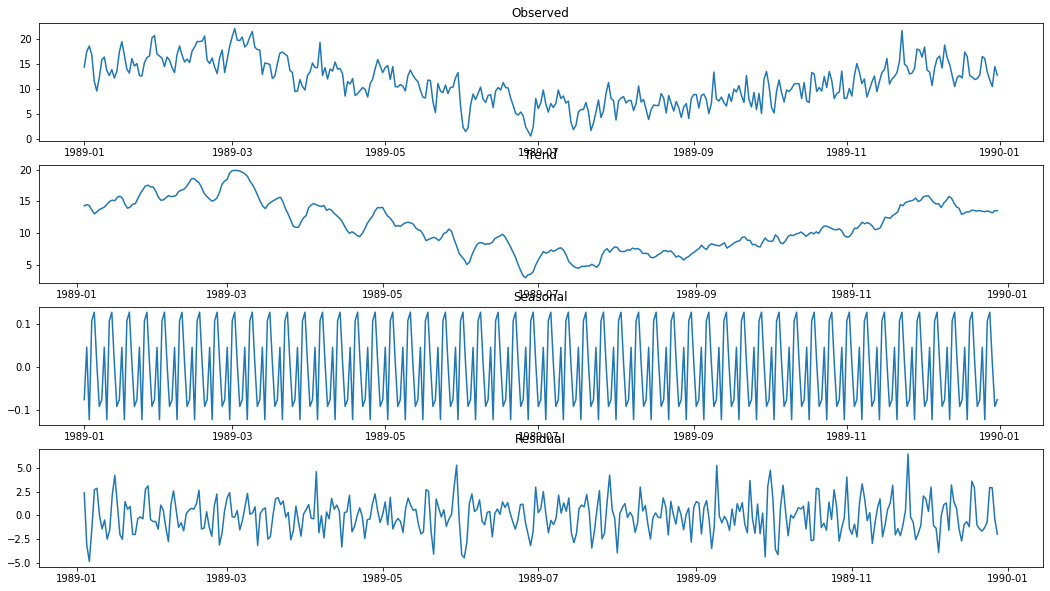

In [19]:
decomposed_additive = seasonal_decompose(temp[temp.index.year == 1989],model='additive')

plt.figure(figsize=(18,10))
plt.subplot(4,1,1)
plt.plot(decomposed_additive.observed)
plt.title('Observed')
plt.subplot(4,1,2)
plt.plot(decomposed_additive.trend)
plt.title('Trend')
plt.subplot(4,1,3)
plt.plot(decomposed_additive.seasonal)
plt.title('Seasonal')
plt.subplot(4,1,4)
plt.plot(decomposed_additive.resid)
plt.title('Residual')
plt.show()

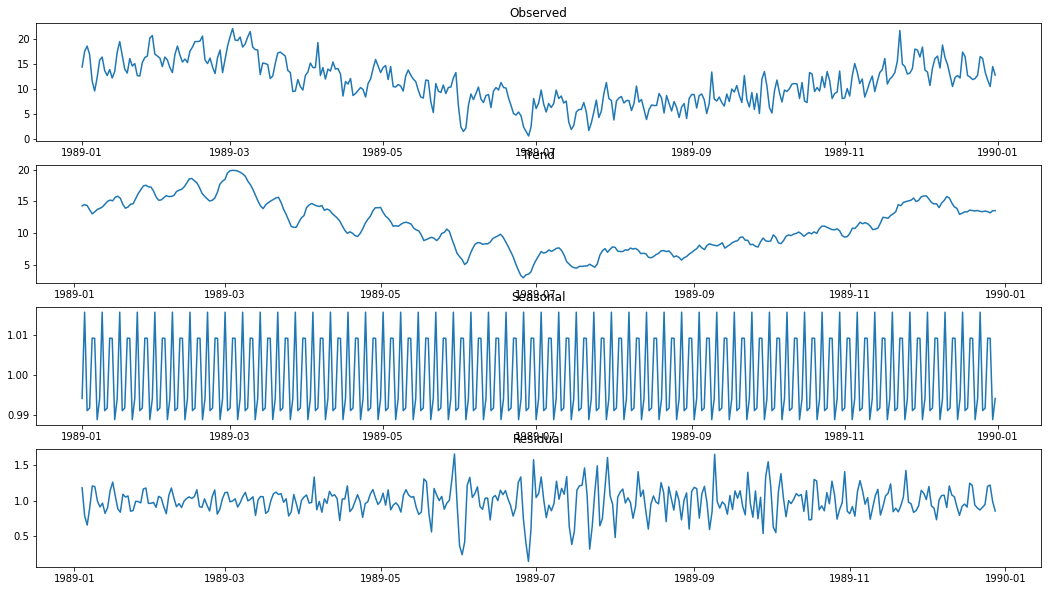

In [20]:
decomposed_additive = seasonal_decompose(temp[temp.index.year == 1989],model='multiplicative')

plt.figure(figsize=(18,10))
plt.subplot(4,1,1)
plt.plot(decomposed_additive.observed)
plt.title('Observed')
plt.subplot(4,1,2)
plt.plot(decomposed_additive.trend)
plt.title('Trend')
plt.subplot(4,1,3)
plt.plot(decomposed_additive.seasonal)
plt.title('Seasonal')
plt.subplot(4,1,4)
plt.plot(decomposed_additive.resid)
plt.title('Residual')
plt.show()

In [21]:
airline = pd.read_csv(r"AirPassengers_Time_series.csv", index_col=0,parse_dates=True)
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


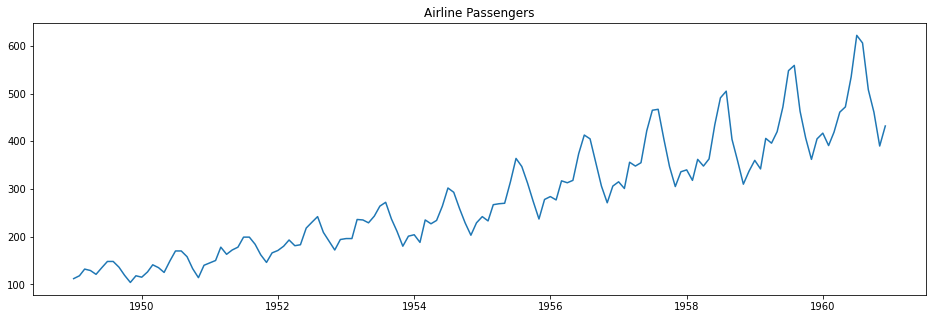

In [22]:
plt.figure(figsize=(16,5))
plt.plot(airline)
plt.title("Airline Passengers")
plt.show()

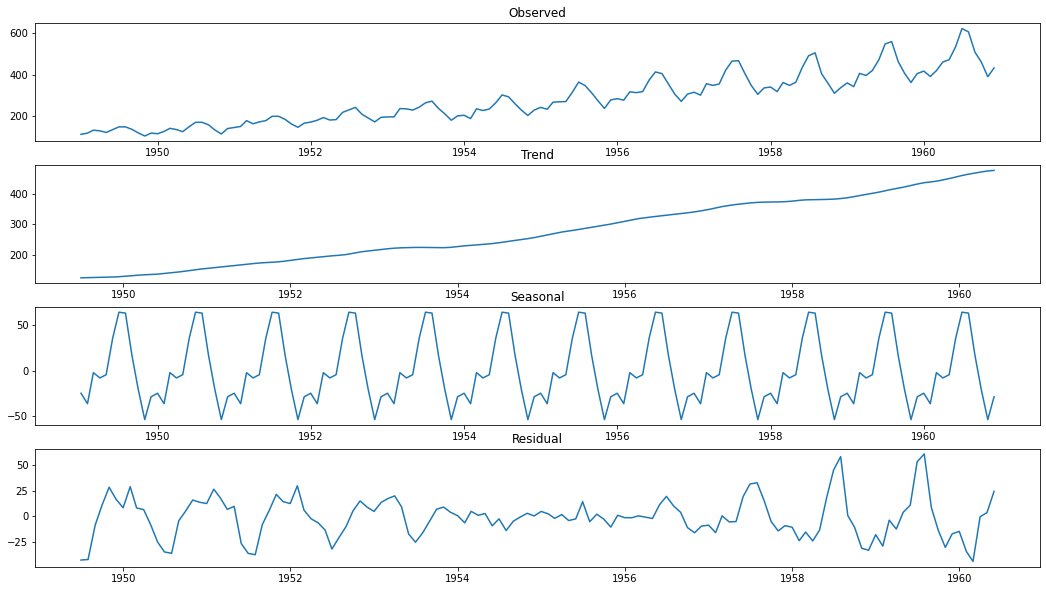

In [23]:
decomposed_additive = seasonal_decompose(airline,model='additive')

plt.figure(figsize=(18,10))
plt.subplot(4,1,1)
plt.plot(decomposed_additive.observed)
plt.title('Observed')
plt.subplot(4,1,2)
plt.plot(decomposed_additive.trend)
plt.title('Trend')
plt.subplot(4,1,3)
plt.plot(decomposed_additive.seasonal)
plt.title('Seasonal')
plt.subplot(4,1,4)
plt.plot(decomposed_additive.resid)
plt.title('Residual')
plt.show()

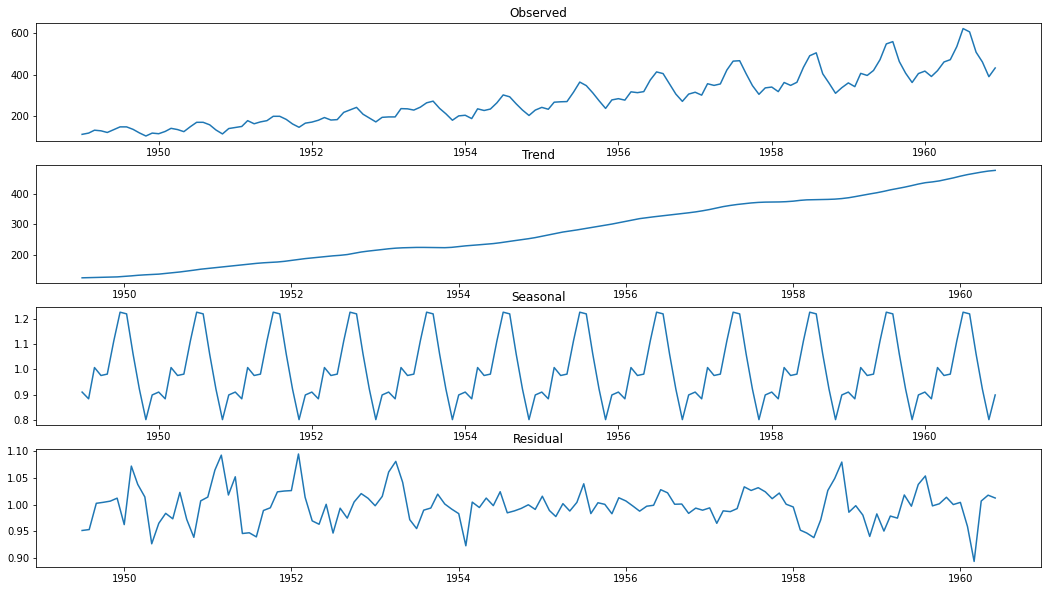

In [24]:
decomposed_additive = seasonal_decompose(airline,model='multiplicative')

plt.figure(figsize=(18,10))
plt.subplot(4,1,1)
plt.plot(decomposed_additive.observed)
plt.title('Observed')
plt.subplot(4,1,2)
plt.plot(decomposed_additive.trend)
plt.title('Trend')
plt.subplot(4,1,3)
plt.plot(decomposed_additive.seasonal)
plt.title('Seasonal')
plt.subplot(4,1,4)
plt.plot(decomposed_additive.resid)
plt.title('Residual')
plt.show()

## Stationarity

In [25]:
X = airline.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


#### airline data is non-stationary

In [26]:
X = temp.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=11.043507, mean2=11.312000
variance1=18.160825, variance2=14.953757


#### Temperature data is stationary

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
X = airline.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [29]:
X = temp.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.444805
p-value: 0.000247
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


## ARIMA

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


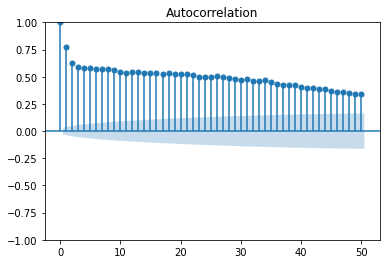

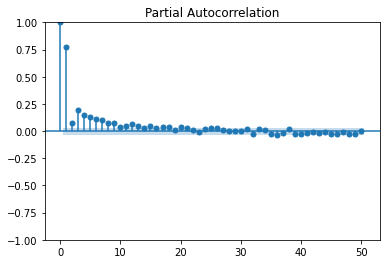

In [31]:
plot_acf(temp,lags=50)
plot_pacf(temp,lags=50)
plt.show()

In [32]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
temp.index = pd.date_range(start="1981-01-01",freq='D',periods=len(temp))
fit = ARIMA(temp,order=(2,0,0),dates=temp.index).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -8618.979
Date:                Wed, 17 Jan 2024   AIC                          17245.958
Time:                        16:10:17   BIC                          17270.767
Sample:                    01-01-1981   HQIC                         17254.793
                         - 12-29-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1908      0.207     53.962      0.000      10.784      11.597
ar.L1          0.7155      0.015     47.484      0.000       0.686       0.745
ar.L2          0.0772      0.016      4.853      0.000       0.046       0.108
sigma2         6.5837      0.144     45.818      0.000       6.302       6.865
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                13.99
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
airline_train = airline[:100]
airline_test = airline[100:]
print(airline_train.shape, airline_test.shape)

(100, 1) (44, 1)


/usr/local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


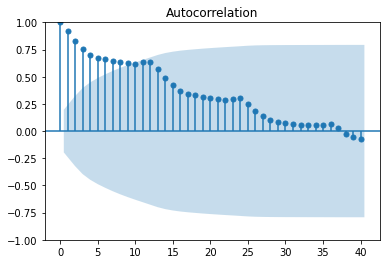

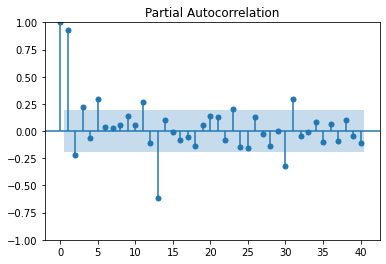

In [38]:
plot_acf(airline_train,lags=40)
plot_pacf(airline_train,lags=40)
plt.show()

In [39]:
fit = ARIMA(airline_train,order=(2,1,0),dates=airline_train.index, freq='MS').fit()
fit.summary()

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  100
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -448.873
Date:                Wed, 17 Jan 2024   AIC                            903.746
Time:                        16:11:55   BIC                            911.531
Sample:                    01-01-1949   HQIC                           906.896
                         - 04-01-1957                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2634      0.100      2.639      0.008       0.068       0.459
ar.L2         -0.2105      0.114     -1.845      0.065      -0.434       0.013
sigma2       507.1700     77.376      6.555      0.000     355.516     658.824
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 3.31
Prob(Q):                              0.85   Prob(JB):                         0.19
Heteroskedasticity (H):               4.33   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

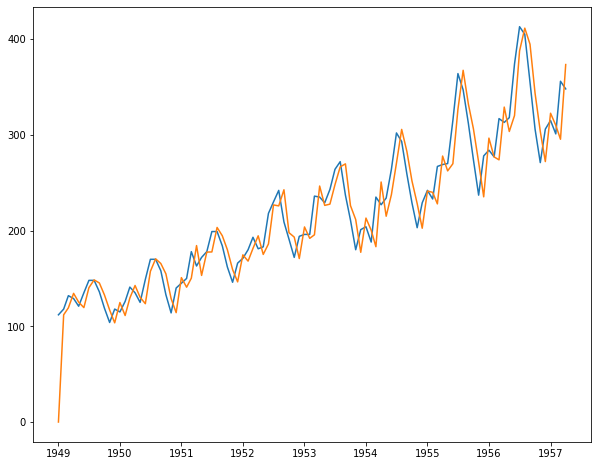

In [41]:
y_pred = fit.predict()
plt.figure(figsize=(10,8))
plt.plot(airline_train)
plt.plot(y_pred)
plt.show()